Noor Rizky Permana
C030322027

In [348]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.data import coins 
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import label, closing,square
from skimage.measure import regionprops
from skimage.color import lab2rgb
%matplotlib inline

In [349]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap=cmap)
    ax.set_axis_off()
    plt.show()

In [350]:
img = cv2.imread("image copy.png", cv2.IMREAD_GRAYSCALE)

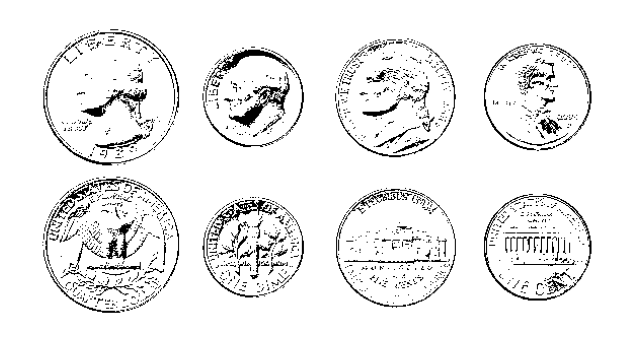

In [351]:
threshold_otsu(img)
107
show(img > 107)

C:\Users\noriz\AppData\Local\Temp\ipykernel_20604\2121412280.py:1: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  img_bin = clear_border(closing(img > 200, square(5)))


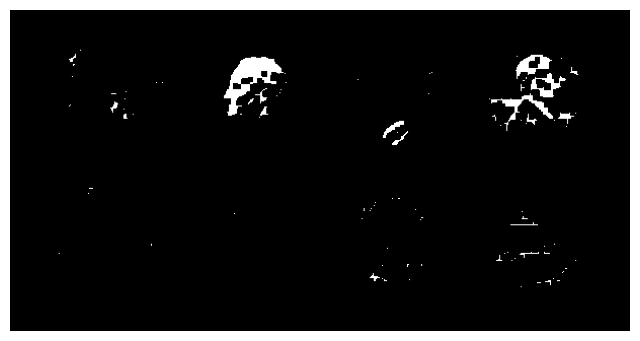

In [352]:
img_bin = clear_border(closing(img > 200, square(5)))
show(img_bin)

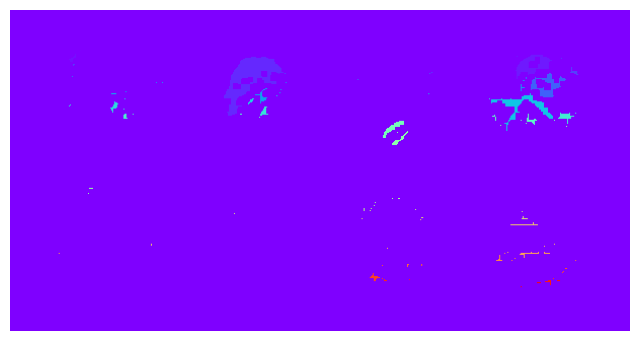

In [353]:
labels = label(img_bin)
show(labels, cmap=plt.cm.rainbow)

In [354]:
regions = regionprops(labels)
boxes = np.array([label["BoundingBox"] for label in regions if label["Area"] > 100])

In [355]:
print(f"There are {len(boxes)} coins.")

There are 5 coins.


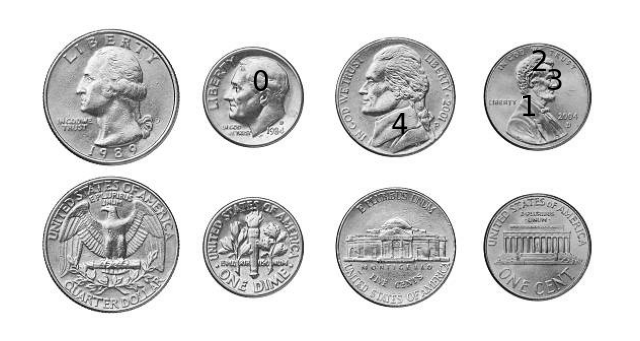

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()

# Get the coordinates of the boxes.
xs = boxes[:, [1, 3]].mean(axis=1)
ys = boxes[:, [0, 2]].mean(axis=1)

# We reorder the boxes by increasing column first, and row second.
for row in range(2):

    # We select the coins in each of the four rows.
    if row < 1:
        ind = (ys[4 * row] <= ys) & (ys < ys[4 * row + 4])
    else:
        ind = ys[4 * row] <= ys

    # We reorder by increasing x coordinate.
    ind = np.nonzero(ind)[0]
    reordered = ind[np.argsort(xs[ind])]
    xs_row = xs[reordered]
    ys_row = ys[reordered]

    # We display the coin number.
    for col in range(len(xs_row)):
        # for col in range(4):
        n = 4 * row + col
        ax.text(xs_row[col] - 3, ys_row[col] + 3, str(n), fontsize=20)